# Intro

### Objective:

The objective of this project is to use a dataset of NBA player's statistics to classify whether a player is a point guard (one of the five positions in basketball) or not, using K-Nearest Neighbors algorithim. 

Data was aquired from [nba.com](https://www.nba.com/stats/players/bio?Season=2021-22) and [basketball-reference.com](https://www.basketball-reference.com/leagues/NBA_2022_per_game.html)

(Data from 2021-2022 NBA season)

### K-Nearest Neighbors

K-Nearest Neighbors, or KNN for short, is defined as "a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified" ([A Simple Introduction to K-Nearest Neighbors Algorithm](https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e))

In this project, given different statistics, a player will be classified as a point guard or not a point guard with KNN algorithm

### NBA Point Guard

The National Basketball Association is the largest professional basketball league in the world. There are 30 teams with numerous players each, but only 5 players play against the opposing teams 5 players at a time, with subsititues being present. These 5 players are in the position of Center, Small Forward, Power Forward, Shooting Guard and Point Guard.

In this project, the focus will be on the <b>Point Guard</b>.

There are many details as to what makes an NBA Point Guard. Rather than engage in this discussion here, the following links to articles will be provided:
[lines.com](https://www.lines.com/guides/average-height-nba-players/1519)

[youthhoops101.com](https://www.youthhoops101.com/point-guard-basketball.html)

[nba.com](https://www.nba.com/stats/alltime-leaders?SeasonType=Regular%20Season&StatCategory=STL)

[usab.com](https://www.usab.com/youth/news/2011/06/7ways-to-make-a-better-point-guard.aspx#:~:text=A%20good%20point%20guard%20is,against%20the%20opposing%20point%20guard.)

From analyzing the articles, attributes are chosen to predict whether a given player is a Point Guard or not. Point Guards on average have the shortest <b>height</b>, most <b>assists per game</b>, most <b>steals per game</b>, and most <b>turnovers per game</b>. Therefore, for this KNN project, these four attributes will be selected.

# Gathering and Analyzing Data

In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

- One dataset contains the assists, steals, and turnover. Another contains the heights.

In [359]:
#Column name 'AST' represents assists per game, 'STL' represents steals per game, 'TOV' represents turnovers per game

nba_stats = pd.read_csv("/Users/Tahsin/Downloads/nbastats.csv", encoding= 'unicode_escape')
nba_stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [360]:
#Column name 'HEIGHT' represents the height in the format "feet-inches"

nba_heights = pd.read_csv("/Users/Tahsin/Downloads/nbaheight.csv", encoding= 'unicode_escape')
nba_heights

,PLAYER,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,GP,PTS,REB,AST,NETRTG,OREB%,DREB%,USG%,TS%,AST%
0,Aaron Gordon,DEN,26,6-8,235,Arizona,USA,2014,1,4,75,15.0,5.9,2.5,6.2,5.7,12.9,19.4,60.2,10.9
1,Aaron Henry,PHI,22,6-5,210,Michigan State,USA,Undrafted,Undrafted,Undrafted,6,0.3,0.2,0.0,-56.0,0.0,4.8,14.9,20.0,0.0
2,Aaron Holiday,PHX,25,6-0,185,UCLA,USA,2018,1,23,63,6.3,1.9,2.4,-1.4,2.3,9.2,18.2,54.4,22.3
3,Aaron Nesmith,BOS,22,6-5,215,Vanderbilt,USA,2020,1,14,52,3.8,1.7,0.4,3.0,2.5,11.7,16.4,50.7,5.7
4,Aaron Wiggins,OKC,23,6-4,190,Maryland,USA,2021,2,55,50,8.3,3.6,1.4,-8.1,4.0,9.8,14.9,55.6,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Zach LaVine,CHI,27,6-5,200,UCLA,USA,2014,1,13,67,24.4,4.6,4.5,-0.9,1.0,12.1,28.4,60.5,20.7
601,Zavier Simpson,OKC,25,6-0,190,Michigan,USA,Undrafted,Undrafted,Undrafted,4,11.0,5.3,7.5,-26.5,1.0,11.4,15.8,40.6,25.0
602,Zeke Nnaji,DEN,21,6-9,240,Arizona,USA,2020,1,22,41,6.6,3.6,0.4,-3.2,7.7,14.1,14.6,62.9,3.7
603,Ziaire Williams,MEM,20,6-9,185,Stanford,USA,2021,1,10,62,8.1,2.1,1.0,4.2,1.7,7.1,14.4,55.9,6.2


- The nba_stats dataframe has more rows than the nba_heights. This is because the nba_stats has some players repeated if they played for different teams the same season. To fix this, the player's best performances will be chosen (the first entry of their names, since the table is based on ranking).


- In nba_stats, some names have diacritical marks, like "Marjanović", or intials. These need to be made regular alphabet since nba_heights has it in regular alphabet.


- The nba_heights dataframe has the heights in feet and inch format. For smoothness, this will be converted fully to inches.

In [361]:
#Clearing duplicates and alphabetizing 

nba_stats = nba_stats.drop_duplicates(subset = ['Player'],keep='first').sort_values('Player')
nba_stats.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
260,198,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,...,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
303,233,Aaron Henry,SF,22,PHI,6,0,2.8,0.2,0.8,...,NaN,0.0,0.2,0.2,0.0,0.0,0.3,0.3,0.3,0.3
321,244,Aaron Holiday,PG,25,TOT,63,15,16.2,2.4,5.4,...,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
548,406,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,...,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8
781,581,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,...,0.729,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3


In [362]:
#Replacing names with diacritical marks and accents in order to merge two dataframes
#First find names with such marks and accents in list called "old"

player = np.array(nba_stats['Player'])
PLAYER = np.array(nba_heights['PLAYER'])

old = []
for i in player:
    if i not in PLAYER:
        old.append(i)

#Next gather alphabet equivalent in list called "new"
new = []
for i in PLAYER:
    if i not in player:
        new.append(i)

#Finally, remove old rows and replace with new rows
name_stat = nba_stats[nba_stats['Player'].isin(old)]
new_name_stat = name_stat.copy()
new_name_stat.drop('Player', axis = 1)
new_name_stat['Player'] = new
index_drop = name_stat.index
nba_stats = nba_stats.drop(index_drop)
nba_stats = pd.concat([nba_stats, new_name_stat])

In [363]:
#For loop to check if all names of players in nba_heights are exactly in nba_stats
player = np.array(nba_stats['Player'])
PLAYER = np.array(nba_heights['PLAYER'])

new1 = []
for i in PLAYER:
    if i in player:
        new1.append(i)
if len(new1) == len(nba_stats) & len(nba_heights):
    print(True)

True


In [364]:
#Changing height format

old_height = np.array(['5-9', '5-10', '5-11', '6-0', '6-1', '6-2', '6-3', '6-4', '6-5', '6-6', '6-7', '6-8', '6-9', '6-10', '6-11', '7-0', '7-1', '7-2', '7-3', '7-4', '7-5', '7-6'])
new_height = np.array([69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])

nba_heights['HEIGHT'] = nba_heights['HEIGHT'].replace(old_height, new_height)
nba_heights['HEIGHT'] = pd.to_numeric(nba_heights['HEIGHT'])

nba_heights.head(5)

,PLAYER,TEAM,AGE,HEIGHT,WEIGHT,COLLEGE,COUNTRY,DRAFT YEAR,DRAFT ROUND,DRAFT NUMBER,GP,PTS,REB,AST,NETRTG,OREB%,DREB%,USG%,TS%,AST%
0,Aaron Gordon,DEN,26,80,235,Arizona,USA,2014,1,4,75,15.0,5.9,2.5,6.2,5.7,12.9,19.4,60.2,10.9
1,Aaron Henry,PHI,22,77,210,Michigan State,USA,Undrafted,Undrafted,Undrafted,6,0.3,0.2,0.0,-56.0,0.0,4.8,14.9,20.0,0.0
2,Aaron Holiday,PHX,25,72,185,UCLA,USA,2018,1,23,63,6.3,1.9,2.4,-1.4,2.3,9.2,18.2,54.4,22.3
3,Aaron Nesmith,BOS,22,77,215,Vanderbilt,USA,2020,1,14,52,3.8,1.7,0.4,3.0,2.5,11.7,16.4,50.7,5.7
4,Aaron Wiggins,OKC,23,76,190,Maryland,USA,2021,2,55,50,8.3,3.6,1.4,-8.1,4.0,9.8,14.9,55.6,8.3


- Next the two dataframes will be merged into one with relevant attributes height, assists, steals, turnovers, and position

- Note: The value "PG" under the "Pos" column in nba_stats stands for Point Guard

In [392]:
merging_height = nba_heights[['PLAYER','HEIGHT']]
merging_stat = nba_stats[['Player','AST','STL','TOV','Pos']]

nba_data = merging_height.merge(merging_stat, left_on='PLAYER', right_on ='Player')
nba_data = nba_data.drop('Player', axis = 1)
nba_data.head(10)

,PLAYER,HEIGHT,AST,STL,TOV,Pos
0,Aaron Gordon,80,2.5,0.6,1.8,PF
1,Aaron Henry,77,0.0,0.0,0.3,SF
2,Aaron Holiday,72,2.4,0.7,1.1,PG
3,Aaron Nesmith,77,0.4,0.4,0.6,SF
4,Aaron Wiggins,76,1.4,0.6,1.1,SG
5,Abdel Nader,77,0.5,0.6,0.8,SF
6,Ade Murkey,77,0.0,0.0,0.0,SG
7,Admiral Schofield,77,0.7,0.1,0.6,SF
8,Ahmad Caver,74,0.0,0.0,0.0,SG
9,Al Horford,81,3.4,0.7,0.9,C


In [366]:
#Looking at means of attributes by position

point=nba_data.loc[nba_data['Pos']=='PG']
shoot=nba_data.loc[nba_data['Pos']=='SG']
center=nba_data.loc[nba_data['Pos']=='C']
power=nba_data.loc[nba_data['Pos']=='PF']
small=nba_data.loc[nba_data['Pos']=='SF']
column_array = ['HEIGHT',
 'AST',
 'STL',
 'TOV',]
point_stat = point[column_array].mean(axis = 0)
shoot_stat = shoot[column_array].mean(axis = 0)
center_stat = center[column_array].mean(axis = 0)
power_stat = power[column_array].mean(axis = 0)
small_stat = small[column_array].mean(axis = 0)

mean_nba_stat= pd.DataFrame({'PG':point_stat, 'SG':shoot_stat, 'C':center_stat, 'PF':power_stat, 'SF':small_stat})
mean_nba_stat

,PG,SG,C,PF,SF
HEIGHT,73.953271,76.267974,82.377358,80.198113,78.586207
AST,3.597196,1.673203,1.223585,1.539623,1.333621
STL,0.779439,0.592810,0.500943,0.600000,0.562069
TOV,1.458879,0.902614,0.971698,1.016981,0.778448


- The above dataframe proves that point guard do indeed have on average smaller heights, more assists per game, more steals per game, and more turn overs per game

# K-Nearest Neighbor

- Looking at the data, point guards have the value 'PG', as do the other positions. This will be changed to numbers, with 1 representing a point guard and 0 representing not a point guard.

In [367]:
nba_data['Pos']=nba_data['Pos'].replace(['PG', 'PG-SG'], 1)
nba_data['Pos']=nba_data['Pos'].replace(['SG','PF','SF','C','C-PF','PF-C','PF-SF','SG-PF','SF-SG','SG-PG-SF','SG-SF','SG-PG'], 0)
pd.to_numeric(nba_data["Pos"])
nba_data.head(100)

,PLAYER,HEIGHT,AST,STL,TOV,Pos
0,Aaron Gordon,80,2.5,0.6,1.8,0
1,Aaron Henry,77,0.0,0.0,0.3,0
2,Aaron Holiday,72,2.4,0.7,1.1,1
3,Aaron Nesmith,77,0.4,0.4,0.6,0
4,Aaron Wiggins,76,1.4,0.6,1.1,0
...,...,...,...,...,...,...
95,Cole Anthony,75,5.7,0.7,2.6,1
96,Collin Sexton,73,2.1,0.9,2.8,0
97,Corey Kispert,78,1.1,0.5,0.6,0
98,Cory Joseph,75,3.6,0.6,1.3,1


- The first step in the KNN is to standardized the values of the dataframe. This is because the values are of different ranges, for example height being a large number like 80 (inches) while assists being a small number like 3 (assists per game).

In [368]:
s = StandardScaler()
standard_data = nba_data[['HEIGHT', 'AST', 'TOV', 'STL']]
s.fit(standard_data)
s_nba_data = s.transform(standard_data)

In [369]:
standard_column = list(standard_data.columns.values)
standard_table = pd.DataFrame(s_nba_data)
standard_table.columns = standard_column
standard_table.head(5)

,HEIGHT,AST,TOV,STL
0,0.579766,0.344782,0.950128,-0.016353
1,-0.331295,-1.019641,-0.868179,-1.464179
2,-1.849728,0.290205,0.101585,0.224952
3,-0.331295,-0.801333,-0.504518,-0.498962
4,-0.634981,-0.255564,0.101585,-0.016353


- The next step is to come up with a model to test how well the KNN algorithm works for this project. The [train test split](https://builtin.com/data-science/train-test-split) model will be used.

In [385]:
x_train, x_test, y_train, y_test = train_test_split(s_nba_data, nba_data['Pos'], test_size = 0.25)

For the KNN, a value of K needs to be chosen. The best K value is desired so that the model has the best accuracy. A plot will be made and compared in order to [choose the best K value](https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb) .

In [386]:
#Finding the best k value 

acc = []

newt = range(1, 51, 1)
for k in range(1, 51, 1):
    knn_example = KNeighborsClassifier(n_neighbors=k)
    cross = cross_val_score(knn_example, x_train, y_train, cv=None, scoring='accuracy')
    acc.append(cross.mean())

range(1, 51, 1)[acc.index(max(acc))]

13

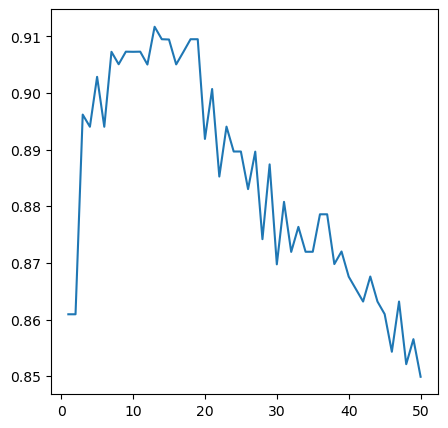

In [387]:
#plot showing accuracy based on k value

plt.figure(figsize=(5,5))
plt.plot(newt, acc)

- With the best k value acquired, we will run the model and print out the accuracy scores 

In [388]:
#euclidean distance used 

knn = KNeighborsClassifier(n_neighbors=13, p=2, metric = 'euclidean')
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

In [389]:
#Confusion matrix 

print(confusion_matrix(y_test, prediction))

[[122   3]
 [  8  19]]


In [390]:
#Accuracy 

print(accuracy_score(y_test, prediction))

0.9276315789473685


# Conclusion

<b>Findings</b>

Using the four attributes of height, assists per game, steals per game, and turnovers per game, the model was able to predict whether a player belonged to the point guard role or did not. After testing the model with a test size of 25%, it returned with a 92.7% accuracy rate with a k value of 13, which is fairly good. The confusion matrix also shows this in more detail.

<b>What could have gone wrong</b>
1. First, there were few players that had interchangeable parts (some players could be both point guard and shooting guard). In this project, most were simply tossed into the non-point guard positions.
2. The NBA point guard position [has changed](https://www.youtube.com/watch?v=ytyt-LsNejU&ab_channel=LegendOfWinning). Today, many argue that point guards and shooting guards are simply guards; that perhaps twenty years ago the point guard and shooting guard was different, but today it is not. This is a very likely argument, especially since the 2021-2022 season, those classed as "point guards" scored on average higher than "shooting guards".
3. Lastly, there are other, perhaps better, attributes that make up the definition of a point guard, such as basketball IQ, ball-handling, dribbling, etc.
